<a href="https://colab.research.google.com/github/gabisaitop/Clusters/blob/main/AtividadeSwift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import font
import seaborn as sns
import datetime

In [6]:
df = pd.read_csv('Swift_SALES.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [7]:
df_list = df[['id_cliente', 'id_pedido', 'item_id', 'preco', 'horario_pedido']]
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2020-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2020-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2020-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2020-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2021-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [8]:
df_list.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35
1,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,1,112.99,2020-11-09 00:50:13
2,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,2,112.99,2020-11-09 00:50:13
3,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26
4,6bc8d08963a135220ed6c6d098831f84,2e604b3614664aa66867856dba7e61b7,1,106.99,2021-02-03 19:45:40


In [9]:
df_compra = df.groupby('id_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_cliente', 'DataMaxCompra']
df_compra.head()

,id_cliente,DataMaxCompra
0,00012a2ce6f8dcda20d059ce98491703,2020-11-14 16:08:26
1,000161a058600d5901f007fab4c27140,2020-07-16 09:40:32
2,0001fd6190edaaf884bcaf3d49edf079,2020-02-28 11:06:43
3,0002414f95344307404f0ace7a26f1d5,2020-08-16 13:09:20
4,000379cdec625522490c315e70c7a9fb,2021-04-02 13:42:17


In [10]:
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])

In [11]:
df_compra['Recencia'] = (datetime.datetime.today() - df_compra['DataMaxCompra']).dt.days
df_compra.head()

,id_cliente,DataMaxCompra,Recencia
0,00012a2ce6f8dcda20d059ce98491703,2020-11-14 16:08:26,731
1,000161a058600d5901f007fab4c27140,2020-07-16 09:40:32,853
2,0001fd6190edaaf884bcaf3d49edf079,2020-02-28 11:06:43,992
3,0002414f95344307404f0ace7a26f1d5,2020-08-16 13:09:20,822
4,000379cdec625522490c315e70c7a9fb,2021-04-02 13:42:17,593


In [12]:
df_cliente = pd.merge(df_list, df_compra[['id_cliente', 'Recencia']], on = 'id_cliente')
df_cliente.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,Recencia
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,914
1,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,1,112.99,2020-11-09 00:50:13,737
2,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,2,112.99,2020-11-09 00:50:13,737
3,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,922
4,6bc8d08963a135220ed6c6d098831f84,2e604b3614664aa66867856dba7e61b7,1,106.99,2021-02-03 19:45:40,650


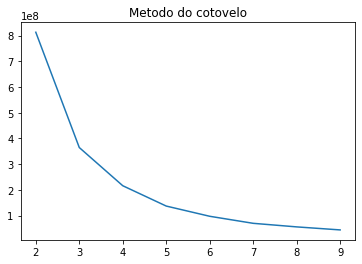

In [13]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

df_recencia = df_cliente[['Recencia']]

wcss=[]
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=len(df_recencia), n_init=10, random_state=0)
    kmeans.fit(df_recencia)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,10), wcss)
plt.title('Metodo do cotovelo')
plt.show()

In [14]:
import math

def numero_otimo_cluster(wcss, cluster_final) :
  x0, y0 = 2, wcss[0]
  x1, y1 = cluster_final, wcss[-1]
  distancia = []

  for i in range(len(wcss)):
    x = i + 2
    y = wcss[i]

    numerator = abs((y1 - y0)*x - (x1 - x0)*y + x1*y0 - y1*x0)
    denominator = math.sqrt((y1-y0)**2 + (x1-x0)**2)
    distance=(numerator/denominator)
    distancia.append(distance)
    
  return distancia.index(max(distancia))+2

print('O cluster ideal é: ', numero_otimo_cluster(wcss, 10))

O cluster ideal é:  4


In [15]:
KMeans = KMeans(n_clusters=4)
df_cliente['RecenciaCluster'] = KMeans.fit_predict(df_recencia)
df_cliente.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,Recencia,RecenciaCluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,914,0
1,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,1,112.99,2020-11-09 00:50:13,737,2
2,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,2,112.99,2020-11-09 00:50:13,737,2
3,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,922,0
4,6bc8d08963a135220ed6c6d098831f84,2e604b3614664aa66867856dba7e61b7,1,106.99,2021-02-03 19:45:40,650,1


In [16]:
#calcular a media de cada cluster
agrupado_por_cluster = df_cliente.groupby('RecenciaCluster')['Recencia'].mean().reset_index()
agrupado_por_cluster.head()

,RecenciaCluster,Recencia
0,0,930.434504
1,1,627.949411
2,2,760.338448
3,3,506.694614


In [17]:
#colocar em ordem para dar pontuação dos clientes... quando autor a media da recencia... mais pontos...
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='Recencia', ascending=False).reset_index()
agrupado_por_cluster_ordenado.head()

,index,RecenciaCluster,Recencia
0,0,0,930.434504
1,2,2,760.338448
2,1,1,627.949411
3,3,3,506.694614


In [18]:
#add uma nova coluna "index score" para salvar a ordenacao
agrupado_por_cluster_ordenado['score'] =  agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado = agrupado_por_cluster_ordenado.drop(['index'], axis = 1)
agrupado_por_cluster_ordenado.head()

,RecenciaCluster,Recencia,score
0,0,930.434504,0
1,2,760.338448,1
2,1,627.949411,2
3,3,506.694614,3


In [19]:
#Pereparar para adicionar[
juntando_cluster = pd.merge(df_cliente, agrupado_por_cluster_ordenado [['RecenciaCluster', 'score']], on='RecenciaCluster')
juntando_cluster.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,Recencia,RecenciaCluster,score
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,914,0,0
1,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,922,0,0
2,fd3a0b1bd209f0e7d420c9c3d1127613,574fe1739f65af76badd0999db300b4f,1,126.99,2020-03-23 15:10:17,968,0,0
3,fbd40c083aa8cddebb5265b2ba6aaf2e,e0b26f14d2bcc710bb02f77a4628763b,1,124.99,2020-05-16 10:00:49,914,0,0
4,10558ef4afea173bfb5e2cbe3d5b0bb5,eaae5bd20fb15d85aa673d9b7c0e8ca5,1,126.99,2020-03-18 23:04:36,972,0,0


In [20]:
#removendo os dados da coliuna cluster
removendo_dados = juntando_cluster.drop(['RecenciaCluster'], axis=1)
removendo_dados.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,Recencia,score
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,914,0
1,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,922,0
2,fd3a0b1bd209f0e7d420c9c3d1127613,574fe1739f65af76badd0999db300b4f,1,126.99,2020-03-23 15:10:17,968,0
3,fbd40c083aa8cddebb5265b2ba6aaf2e,e0b26f14d2bcc710bb02f77a4628763b,1,124.99,2020-05-16 10:00:49,914,0
4,10558ef4afea173bfb5e2cbe3d5b0bb5,eaae5bd20fb15d85aa673d9b7c0e8ca5,1,126.99,2020-03-18 23:04:36,972,0


In [21]:
df_final = removendo_dados.rename(columns={'score': 'RecenciaScore'})
df_final.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,Recencia,RecenciaScore
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,914,0
1,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,922,0
2,fd3a0b1bd209f0e7d420c9c3d1127613,574fe1739f65af76badd0999db300b4f,1,126.99,2020-03-23 15:10:17,968,0
3,fbd40c083aa8cddebb5265b2ba6aaf2e,e0b26f14d2bcc710bb02f77a4628763b,1,124.99,2020-05-16 10:00:49,914,0
4,10558ef4afea173bfb5e2cbe3d5b0bb5,eaae5bd20fb15d85aa673d9b7c0e8ca5,1,126.99,2020-03-18 23:04:36,972,0


In [22]:
#função gráfica
def plot_perc(st, dados):
  g = sns.countplot(x=st, data=dados, orient='h')
  g.set_ylabel('Valores')
  sizes = []

  for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x() + p.get_width()/1.6, height + 200, '{:1.2f}%'.format(height/116581*100), ha='center', va='bottom', fontSize=12)

  g.set_ylim(0, max(sizes)* 1.1)

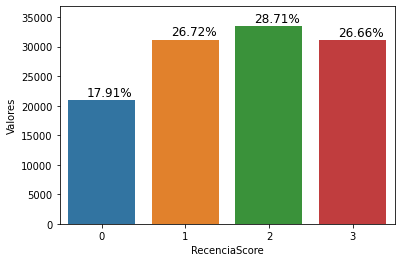

In [23]:
plot_perc('RecenciaScore', df_final)

In [24]:
#Sugestão: montar funcao para adicionar e organizar o SCORE por cluster
# - cluster_name: campo com os grupos de cluster
# - target_name: campo objeto de analise
# - score_name: nome final do campo após finalizar o processo
# - df: DataFrame com o resultado do K-means
# - ordem: True - crescente / False - decrescente

def ordernador_cluster(cluster_name, target_name, score_name, df, ordem):
    agrupado_por_cluster = df.groupby(cluster_name)[target_name].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_name,ascending=ordem).reset_index(drop=True)
    agrupado_por_cluster_ordenado['score'] = agrupado_por_cluster_ordenado.index
    juntanto_cluster = pd.merge(df, agrupado_por_cluster_ordenado[[cluster_name,'score']], on=cluster_name)
    removendo_dados = juntanto_cluster.drop([cluster_name],axis = 1)
    df_final = removendo_dados.rename(columns={'score': score_name})
    return df_final


In [25]:
#carregar na base de cliente
df_cliente = ordernador_cluster('RecenciaCluster','Recencia','RecenciaScore', df_cliente, False)
df_cliente.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,Recencia,RecenciaScore
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,914,0
1,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,922,0
2,fd3a0b1bd209f0e7d420c9c3d1127613,574fe1739f65af76badd0999db300b4f,1,126.99,2020-03-23 15:10:17,968,0
3,fbd40c083aa8cddebb5265b2ba6aaf2e,e0b26f14d2bcc710bb02f77a4628763b,1,124.99,2020-05-16 10:00:49,914,0
4,10558ef4afea173bfb5e2cbe3d5b0bb5,eaae5bd20fb15d85aa673d9b7c0e8ca5,1,126.99,2020-03-18 23:04:36,972,0


In [26]:
df_final.groupby('RecenciaScore')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaScore,,,,,,,,
0,20879.0,930.434504,59.456467,846.0,884.0,921.0,973.0,1168.0
1,31154.0,760.338448,44.082180,695.0,721.0,754.0,798.0,845.0
2,33466.0,627.949411,35.090944,568.0,598.0,627.0,658.0,694.0
3,31082.0,506.694614,36.178740,439.0,473.0,507.0,541.0,567.0


In [27]:
#mostra estrutura da base de dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [28]:
#calcular o score para frequencia:
#definir campo de frequencia
df_frequencia = df.groupby('id_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_cliente', 'Frequencia']
print(df_frequencia)

                             id_cliente  Frequencia
0      00012a2ce6f8dcda20d059ce98491703           1
1      000161a058600d5901f007fab4c27140           1
2      0001fd6190edaaf884bcaf3d49edf079           1
3      0002414f95344307404f0ace7a26f1d5           1
4      000379cdec625522490c315e70c7a9fb           1
...                                 ...         ...
97250  fffcb937e9dd47a13f05ecb8290f4d3e           1
97251  fffecc9f79fd8c764f843e9951b11341           3
97252  fffeda5b6d849fbd39689bb92087f431           1
97253  ffff42319e9b2d713724ae527742af25           1
97254  ffffa3172527f765de70084a7e53aae8           2

[97255 rows x 2 columns]


In [29]:
#2o etapa:
#adicionar o calculo no df_cliente:
df_cliente = pd.merge(df_cliente, df_frequencia, on='id_cliente') #precisa saber qual o campo de ligação p fazer a conexao
print(df_cliente)

                              id_cliente                         id_pedido  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  00e7ee1b050b8499577073aeb2a297a1   
1       f0ac8e5a239118859b1734e1087cbb1f  b1a5d5365d330d10485e0203d54ab9e8   
2       fd3a0b1bd209f0e7d420c9c3d1127613  574fe1739f65af76badd0999db300b4f   
3       fbd40c083aa8cddebb5265b2ba6aaf2e  e0b26f14d2bcc710bb02f77a4628763b   
4       10558ef4afea173bfb5e2cbe3d5b0bb5  eaae5bd20fb15d85aa673d9b7c0e8ca5   
...                                  ...                               ...   
116576  ce2172509c4149d65212484eb761bc37  edcf1e1eeb52381be9388c90152be52d   
116577  ee1cfdc92e449920e25d3ca4ab4da4f6  2ef4a11b6e24fdfbb43b92cb5f95edff   
116578  ee1cfdc92e449920e25d3ca4ab4da4f6  2ef4a11b6e24fdfbb43b92cb5f95edff   
116579  ab0cf72dfe0538a63a57d6905ccb7b57  2c12150c742ae2fa48bc703964c16c5f   
116580  c61336d6c835632048f973d2f2db598d  9f7ba492c273ffac8f90a623b8eadd3b   

        item_id   preco       horario_pedido  Recencia  Recenci

In [30]:
df_cliente.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,Recencia,RecenciaScore,Frequencia
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,914,0,1
1,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,922,0,1
2,fd3a0b1bd209f0e7d420c9c3d1127613,574fe1739f65af76badd0999db300b4f,1,126.99,2020-03-23 15:10:17,968,0,1
3,fbd40c083aa8cddebb5265b2ba6aaf2e,e0b26f14d2bcc710bb02f77a4628763b,1,124.99,2020-05-16 10:00:49,914,0,1
4,10558ef4afea173bfb5e2cbe3d5b0bb5,eaae5bd20fb15d85aa673d9b7c0e8ca5,1,126.99,2020-03-18 23:04:36,972,0,1


In [34]:
#criar um df só com frequencia, pois estamos mexendo com apenas um eixo
#definindo os clusters (grupos):
from sklearn.cluster import KMeans

df_frequencia = df_cliente[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_cliente['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia) #cria uma coluna nova chama frequencia cluster dentro de df_cliente
df_cliente.head()


,id_cliente,id_pedido,item_id,preco,horario_pedido,Recencia,RecenciaScore,Frequencia,FrequenciaCluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,914,0,1,0
1,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,922,0,1,0
2,fd3a0b1bd209f0e7d420c9c3d1127613,574fe1739f65af76badd0999db300b4f,1,126.99,2020-03-23 15:10:17,968,0,1,0
3,fbd40c083aa8cddebb5265b2ba6aaf2e,e0b26f14d2bcc710bb02f77a4628763b,1,124.99,2020-05-16 10:00:49,914,0,1,0
4,10558ef4afea173bfb5e2cbe3d5b0bb5,eaae5bd20fb15d85aa673d9b7c0e8ca5,1,126.99,2020-03-18 23:04:36,972,0,1,0


In [36]:
df_cliente.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,108481.0,1.262903,0.527734,0.0,1.0,1.0,1.0,3.0
1,591.0,21.209814,6.132987,14.0,15.0,21.0,24.0,38.0
2,63.0,63.000000,0.000000,63.0,63.0,63.0,63.0,63.0
3,7446.0,5.523234,2.043565,4.0,4.0,5.0,6.0,13.0


In [37]:
df_monetario = df.groupby('id_cliente').pagamento_valor.sum().reset_index()
df_monetario.columns = ['id_cliente', 'Monetario']
df_monetario.head()

,id_cliente,Monetario
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


In [38]:
df_cliente = pd.merge(df_cliente, df_monetario, on='id_cliente')
df_cliente.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,Recencia,RecenciaScore,Frequencia,FrequenciaCluster,Monetario
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,914,0,1,0,146.87
1,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,922,0,1,0,140.61
2,fd3a0b1bd209f0e7d420c9c3d1127613,574fe1739f65af76badd0999db300b4f,1,126.99,2020-03-23 15:10:17,968,0,1,0,142.05
3,fbd40c083aa8cddebb5265b2ba6aaf2e,e0b26f14d2bcc710bb02f77a4628763b,1,124.99,2020-05-16 10:00:49,914,0,1,0,155.70
4,10558ef4afea173bfb5e2cbe3d5b0bb5,eaae5bd20fb15d85aa673d9b7c0e8ca5,1,126.99,2020-03-18 23:04:36,972,0,1,0,148.33


In [39]:
df_monetario = df_cliente[['Monetario']]
kmeans = KMeans(n_clusters=4)
df_cliente['MonetarioCluster'] = kmeans.fit_predict(df_monetario)
df_cliente.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,Recencia,RecenciaScore,Frequencia,FrequenciaCluster,Monetario,MonetarioCluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,914,0,1,0,146.87,0
1,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,922,0,1,0,140.61,0
2,fd3a0b1bd209f0e7d420c9c3d1127613,574fe1739f65af76badd0999db300b4f,1,126.99,2020-03-23 15:10:17,968,0,1,0,142.05,0
3,fbd40c083aa8cddebb5265b2ba6aaf2e,e0b26f14d2bcc710bb02f77a4628763b,1,124.99,2020-05-16 10:00:49,914,0,1,0,155.70,0
4,10558ef4afea173bfb5e2cbe3d5b0bb5,eaae5bd20fb15d85aa673d9b7c0e8ca5,1,126.99,2020-03-18 23:04:36,972,0,1,0,148.33,0


In [40]:
df_cliente.groupby('MonetarioCluster')['Monetario'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetarioCluster,,,,,,,,
0,115712.0,266.814726,450.764818,9.59,67.60,125.645,253.08,4698.72
1,8.0,109312.640000,0.000000,109312.64,109312.64,109312.640,109312.64,109312.64
2,801.0,9244.881985,4621.306368,4764.34,5816.25,7402.920,11572.80,22346.60
3,60.0,40387.892000,6356.085592,29099.52,36489.24,44048.000,45256.00,45256.00


In [41]:
df_cliente = ordernador_cluster('MonetarioCluster', 'Monetario', 'MonetarioScore', df_cliente, True)

In [42]:
df_cliente.groupby('MonetarioScore')['Monetario'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetarioScore,,,,,,,,
0,115712.0,266.814726,450.764818,9.59,67.60,125.645,253.08,4698.72
1,801.0,9244.881985,4621.306368,4764.34,5816.25,7402.920,11572.80,22346.60
2,60.0,40387.892000,6356.085592,29099.52,36489.24,44048.000,45256.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.640,109312.64,109312.64


In [43]:
df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_cliente         116581 non-null  object 
 1   id_pedido          116581 non-null  object 
 2   item_id            116581 non-null  int64  
 3   preco              116581 non-null  float64
 4   horario_pedido     116581 non-null  object 
 5   Recencia           116581 non-null  int64  
 6   RecenciaScore      116581 non-null  int64  
 7   Frequencia         116581 non-null  int64  
 8   FrequenciaCluster  116581 non-null  int32  
 9   Monetario          116581 non-null  float64
 10  MonetarioScore     116581 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 10.2+ MB


In [48]:
df_cliente.info()
df_final = df_cliente[['id_cliente', 'Recencia', 'RecenciaScore', 'Frequencia', 'FrequenciaCluster', 'Monetario', 'MonetarioScore']]
df_final.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_cliente         116581 non-null  object 
 1   id_pedido          116581 non-null  object 
 2   item_id            116581 non-null  int64  
 3   preco              116581 non-null  float64
 4   horario_pedido     116581 non-null  object 
 5   Recencia           116581 non-null  int64  
 6   RecenciaScore      116581 non-null  int64  
 7   Frequencia         116581 non-null  int64  
 8   FrequenciaCluster  116581 non-null  int32  
 9   Monetario          116581 non-null  float64
 10  MonetarioScore     116581 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 10.2+ MB


,id_cliente,Recencia,RecenciaScore,Frequencia,FrequenciaCluster,Monetario,MonetarioScore
116576,1617b1357756262bfa56ab541c47bc16,778,1,8,3,109312.64,3
116577,1617b1357756262bfa56ab541c47bc16,778,1,8,3,109312.64,3
116578,1617b1357756262bfa56ab541c47bc16,778,1,8,3,109312.64,3
116579,1617b1357756262bfa56ab541c47bc16,778,1,8,3,109312.64,3
116580,1617b1357756262bfa56ab541c47bc16,778,1,8,3,109312.64,3


In [53]:
df_final['SCORE'] = df_cliente['MonetarioScore'] + df_cliente['FrequenciaCluster'] + df_cliente['RecenciaScore']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_final.SCORE.max()

8

In [55]:
df_final.groupby('SCORE')['id_cliente'].count()

SCORE
0    19183
1    28995
2    31414
3    30767
4     2135
5     2072
6     1801
7      210
8        4
Name: id_cliente, dtype: int64

In [60]:
df_final['Segmento'] = 'Inativa'
df_final.loc[df_final['SCORE']>=1, 'Segmento'] = 'Business'
df_final.loc[df_final['SCORE']>=2, 'Segmento'] = 'Master'
df_final.loc[df_final['SCORE']>=4, 'Segmento'] = 'Premium'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [61]:
df_final.tail()

,id_cliente,Recencia,RecenciaScore,Frequencia,FrequenciaCluster,Monetario,MonetarioScore,SCORE,Segmento
116576,1617b1357756262bfa56ab541c47bc16,778,1,8,3,109312.64,3,7,Premium
116577,1617b1357756262bfa56ab541c47bc16,778,1,8,3,109312.64,3,7,Premium
116578,1617b1357756262bfa56ab541c47bc16,778,1,8,3,109312.64,3,7,Premium
116579,1617b1357756262bfa56ab541c47bc16,778,1,8,3,109312.64,3,7,Premium
116580,1617b1357756262bfa56ab541c47bc16,778,1,8,3,109312.64,3,7,Premium


In [62]:
df_final.groupby('Segmento')['id_cliente'].count()

Segmento
Business    28995
Inativa     19183
Master      62181
Premium      6222
Name: id_cliente, dtype: int64

In [63]:
df_final.to_csv('RFM_final.csv')